# DSCI 303 - Homework 05

### Mallory Stern

In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])
n = len(x)

mean = np.sum(x) / n
diff = x - mean

var = (np.sum((x - mean) ** 2)) / (n - 1)

print(f'Sample Mean: {mean:>8}')
print(f'Sample Variance: {var}')

Sample Mean:     16.6
Sample Variance: 25.6


In [3]:
mean = np.mean(x)
var = np.var(x, ddof = 1)

print(f'Sample Mean: {mean:>8}')
print(f'Sample Variance: {var}')

Sample Mean:     16.6
Sample Variance: 25.6


## Problem 2: Scoring a Regression Model

In [4]:
def find_sse(true_y, pred_y):
    sse_score = np.sum((true_y - pred_y) ** 2)
    return sse_score

In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)

print(f'Model 1 SSE: {sse_1:.2f}')
print(f'Model 2 SSE: {sse_2:.2f}')

Model 1 SSE: 22.66
Model 2 SSE: 19.90


## Problem 3: Scoring a Classification Model

In [6]:
def find_accuracy(true_y, pred_y):
    accuracy = (np.sum(true_y == pred_y) / len(pred_y))
    return accuracy

In [7]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N',
'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N',
'N', 'P', 'N'])

print(f'Model Accuracy: {find_accuracy(true_diag, pred_diag)}')

Model Accuracy: 0.75


In [8]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])

print(f'Model Accuracy: {find_accuracy(true_labels, pred_labels)}')

Model Accuracy: 0.875


## Problem 4: Classification Report

In [9]:
def classification_report(true_y, pred_y):
    classes = np.unique(true_y)
    accuracy = find_accuracy(true_y, pred_y)
    TP = np.sum(pred_y == true_y)
    FP = np.sum((pred_y == classes[1]) & (pred_y != true_y))
    TN = np.sum(pred_y != true_y)
    FN = np.sum((pred_y == classes[0]) & (pred_y == true_y))
    pos_pre = TP / (TP + FP)
    pos_rec = TP / (TP + FN)
    neg_pre = TN / (TN + FN)
    neg_rec = TN / (TN + FP)
    
    print(f'Positive Class: {classes[1]:>10}')
    print(f'Negative Class: {classes[0]:>10}')
    print(f' ')
    print(f'Accuracy: {accuracy:>16.4f}')
    print(f'Positive Precision: {pos_pre:.4f}')
    print(f'Positive Recall: {pos_rec:>9.4f}')
    print(f'Negative Precision: {neg_pre:.4f}')
    print(f'Negative Recall: {neg_rec:>9.4f}')

In [10]:
classification_report(true_diag, pred_diag)

Positive Class:          P
Negative Class:          N
 
Accuracy:           0.7500
Positive Precision: 0.7895
Positive Recall:    0.6000
Negative Precision: 0.3333
Negative Recall:    0.5556


In [11]:
classification_report(true_labels, pred_labels)

Positive Class:        dog
Negative Class:        cat
 
Accuracy:           0.8750
Positive Precision: 0.9130
Positive Recall:    0.6562
Negative Precision: 0.2143
Negative Recall:    0.6000


## Problem 5: Transformation of Random Variables

In [12]:
np.random.seed(1)
X = np.random.normal(loc = 0, scale = 0.4, size = 25000)
Y = np.exp(X)

print(f'Sample Mean of X: {np.mean(X):>9.4f}')
print(f'Sample Std Dev of X: {np.std(X):.4f}')
print(f'Sample Mean of Y: {np.mean(Y):>9.4f}')
print(f'Sample Std Dev of Y: {np.std(Y):.4f}')

Sample Mean of X:    0.0025
Sample Std Dev of X: 0.4002
Sample Mean of Y:    1.0862
Sample Std Dev of Y: 0.4537


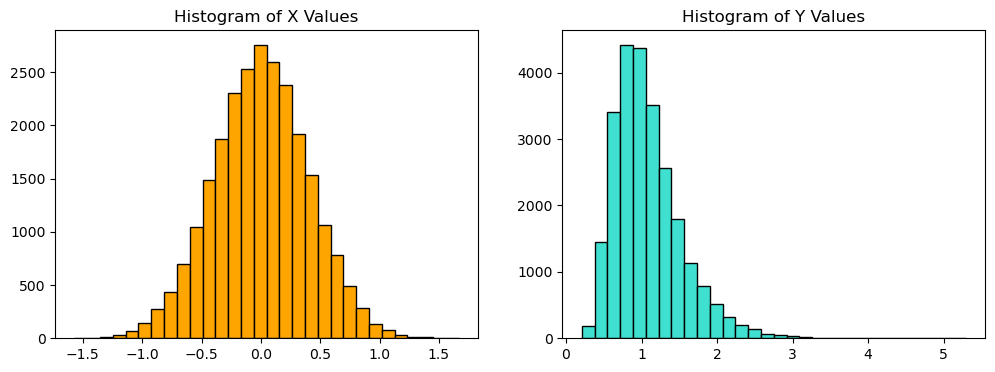

In [13]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.hist(X, edgecolor = 'black', color = 'orange', 
         bins = 30)
plt.title('Histogram of X Values');

plt.subplot(1, 2, 2)
plt.hist(Y, edgecolor = 'black', color = 'turquoise', 
         bins = 30)
plt.title('Histogram of Y Values');

In [14]:
print(f'Probability that Y is less than 0.5: {np.mean(Y[Y < 0.5]):.4f}')
print(f'Probability that Y is less than 1.0: {np.mean(Y[Y < 1]):.4f}')
print(f'Probability that Y is less than 2.0: {np.mean(Y[Y < 2]):.4f}')

Probability that Y is less than 0.5: 0.4290
Probability that Y is less than 1.0: 0.7470
Probability that Y is less than 2.0: 1.0287


## Problem 6: Stochastic Linear Relationships

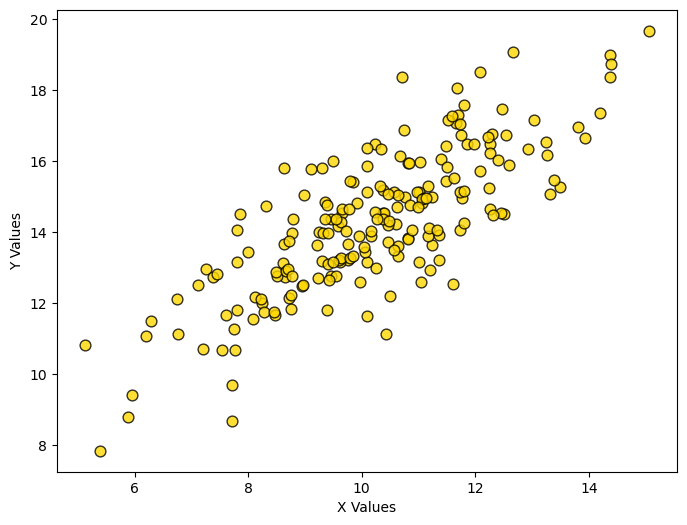

In [15]:
np.random.seed(1)
x_vals = np.random.normal(loc = 10, scale = 2, size = 200)
errors = np.random.normal(loc = 0, scale = 1.2, size = 200)
y_vals = 5.1 + 0.9 * x_vals + errors

plt.figure(figsize = [8, 6])
plt.scatter(x = x_vals, y = y_vals, s = 60, alpha = 0.8, color = 'gold', edgecolor = 'black')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

In [16]:
diff_x = np.mean(x_vals) - x_vals
diff_y = np.mean(y_vals) - y_vals
top_r = np.sum(diff_x) * np.sum(diff_y)
bot_r = (math.sqrt((np.sum(diff_x) ** 2) * (np.sum(diff_y) ** 2)))
r = top_r / bot_r

print(f'Correlation between X and Y: {r:.4f}')

Correlation between X and Y: -1.0000


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

In [17]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [18]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['orange', 'dodgerblue', 'crimson', 'limegreen']

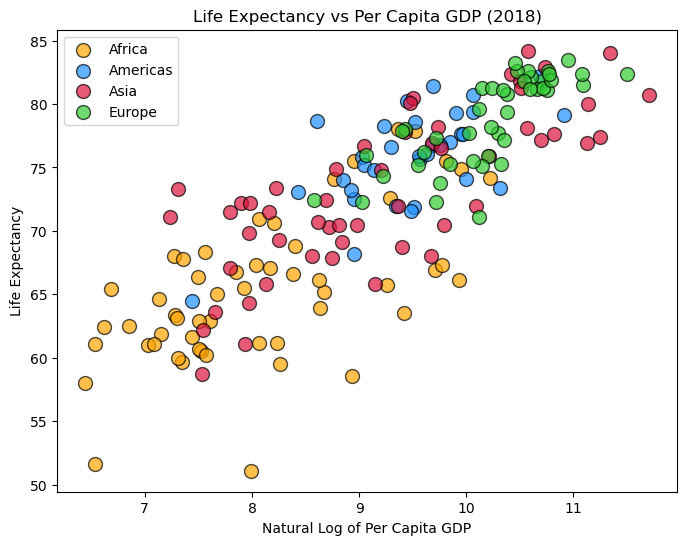

In [19]:
plt.figure(figsize = [8, 6])

for i in range(len(continent_list)):
    sel = (continent == continent_list[i]) & (year == 2018)
    plt.scatter(x = np.log(pcgdp[sel]), y = life_exp[sel], s = 100, alpha = 0.7, 
                color = color_list[i], edgecolor = 'black', label = continent_list[i].title())
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend()
plt.show()

In [1]:
plt.figure(figsize = [10, 8])

for i in range(len(continent_list)):
    plt.subplot(2, 2, i + 1)
    sel = (continent == continent_list[i]) & (year == 2018)
    plt.scatter(x = np.log(pcgdp[sel]), y = life_exp[sel], s = 100, alpha = 0.7, 
                color = color_list[i], edgecolor = 'black')
    plt.xlim([6, 12])
    plt.ylim([45, 90])
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title(continent_list[i].title())

plt.show()

NameError: name 'plt' is not defined

## Problem 8: Trends by Country

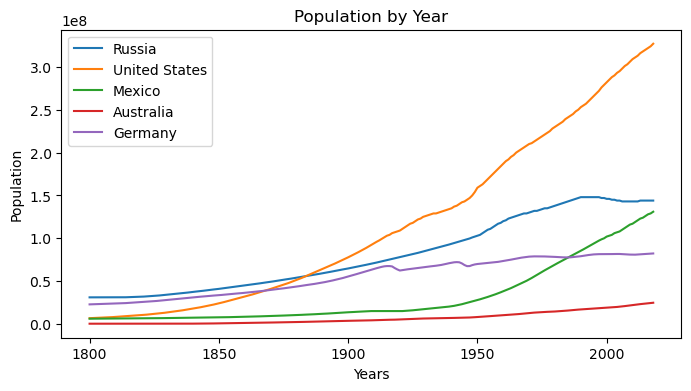

In [21]:
plt.figure(figsize=[8, 4])

plt.plot(year[country == 'Russia'], population[country == 'Russia'], label='Russia')
plt.plot(year[country == 'United States'], population[country == 'United States'], label='United States')
plt.plot(year[country == 'Mexico'], population[country == 'Mexico'], label='Mexico')
plt.plot(year[country == 'Australia'], population[country == 'Australia'], label='Australia')
plt.plot(year[country == 'Germany'], population[country == 'Germany'], label='Germany')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
plt.show()

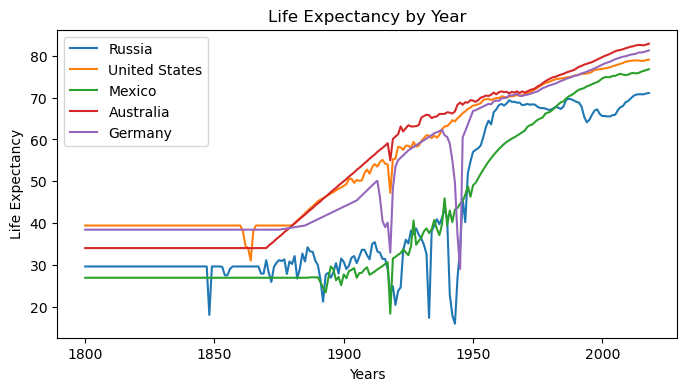

In [22]:
plt.figure(figsize=[8, 4])

plt.plot(year[country == 'Russia'], life_exp[country == 'Russia'], label='Russia')
plt.plot(year[country == 'United States'], life_exp[country == 'United States'], label='United States')
plt.plot(year[country == 'Mexico'], life_exp[country == 'Mexico'], label='Mexico')
plt.plot(year[country == 'Australia'], life_exp[country == 'Australia'], label='Australia')
plt.plot(year[country == 'Germany'], life_exp[country == 'Germany'], label='Germany')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.show()